In [2]:
# lets load all needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf # for downloading data from Yahoo Finance
import numpy as np
import warnings
warnings.simplefilter(action = "ignore", category = UserWarning)  # ignore warnings

# Exercise 1.1

Import daily quotes for three different companies (e.g., MSFT, KO, PEP, AMZN, INTL, or ^GSPC for the S&P 500) from Yahoo Finance.

Combine all closing prices into a single data frame and plot them on a single chart.

In [3]:
# Exercise 1.1

tickers = ['MSFT', 'KO', 'PEP', 'AMZN', 'INTL', '^GSPC']
for t in tickers:
    globals() [f"d_{t}"] = yf.download(t,start = "2005-01-01", end = "2025-10-14") 
    


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
for t in tickers:
    print (globals()[f"d_{t}"])

Price            Close        High         Low        Open     Volume
Ticker            MSFT        MSFT        MSFT        MSFT       MSFT
Date                                                                 
2005-01-03   18.454882   18.599816   18.392767   18.496291   65002900
2005-01-04   18.523899   18.703341   18.399670   18.544604  109442100
2005-01-05   18.482496   18.703347   18.468693   18.523906   72463500
2005-01-06   18.461786   18.675736   18.385868   18.530803   76890500
2005-01-07   18.406574   18.558409   18.372067   18.510098   68723300
...                ...         ...         ...         ...        ...
2025-10-07  523.979980  529.799988  521.440002  528.289978   14615200
2025-10-08  524.849976  526.950012  523.090027  523.280029   13363400
2025-10-09  522.400024  524.330017  517.400024  522.340027   18343600
2025-10-10  510.959991  523.580017  509.630005  519.640015   24133800
2025-10-13  514.049988  516.409973  511.679993  516.409973   14284200

[5228 rows x 5 colu

In [5]:
for t in tickers:

    globals()[f"d_{t}"].columns = globals()[f"d_{t}"].columns.get_level_values(0)
    
print(d_AMZN)


Price            Close        High         Low        Open     Volume
Date                                                                 
2005-01-03    2.226000    2.272000    2.210500    2.247500  208930000
2005-01-04    2.107000    2.163000    2.075000    2.133500  388370000
2005-01-05    2.088500    2.138000    2.078000    2.078500  167084000
2005-01-06    2.052500    2.112500    2.045000    2.090500  174018000
2005-01-07    2.116000    2.134500    2.058000    2.069000  196732000
...                ...         ...         ...         ...        ...
2025-10-07  221.779999  222.889999  220.169998  220.880005   31194700
2025-10-08  225.220001  226.729996  221.190002  222.919998   46686000
2025-10-09  227.740005  228.210007  221.750000  225.000000   46412100
2025-10-10  216.369995  228.250000  216.000000  226.210007   72367500
2025-10-13  220.070007  220.679993  217.039993  217.699997   37809700

[5228 rows x 5 columns]


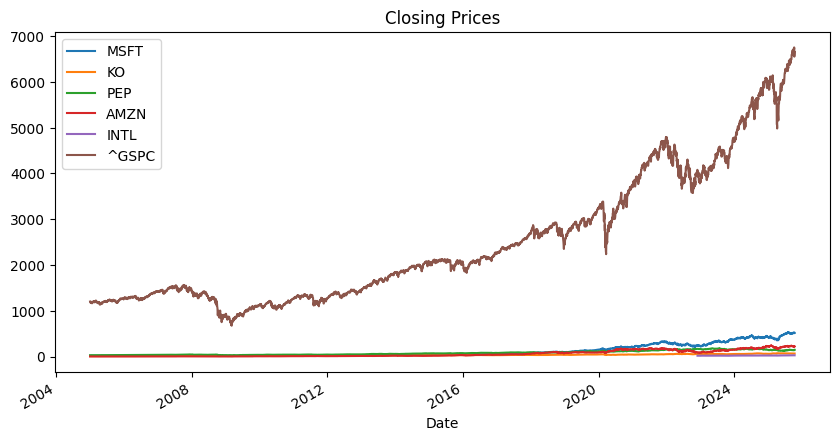

In [6]:


close_prices = pd.DataFrame()
for t in tickers:
    df = globals()[f"d_{t}"]
    close_prices[t] = df['Close']
    
close_prices.plot(figsize=(10, 5), title='Closing Prices')
plt.show()
    

# Exercise 1.2

* Import the EURGBP data from the file located at `"http://coin.wne.uw.edu.pl/pwojcik/hfd/EURGBP-2023-08.csv"
` (data was downloaded from https://www.truefx.com)
* NOTE! The file DOES NOT HAVE a row with column names - assign the following column names: symbol, date_time, bid, ask
* Create a valid datetime index
* Plot the selected columns on the chart

In [7]:

file_path = "http://coin.wne.uw.edu.pl/pwojcik/hfd/EURGBP-2023-08.csv"

data = pd.read_csv(file_path)

data.head()


,EUR/GBP,20230801 00:00:00.003,0.85695,0.85705
0,EUR/GBP,20230801 00:00:00.050,0.85695,0.85704
1,EUR/GBP,20230801 00:00:00.112,0.85696,0.85706
2,EUR/GBP,20230801 00:00:00.128,0.85695,0.85705
3,EUR/GBP,20230801 00:00:00.536,0.85696,0.85705
4,EUR/GBP,20230801 00:00:00.927,0.85695,0.85705


In [10]:
# place for solution to Exercise 1.3
data.columns = ['symbol', 'date_time', 'bid', 'ask']
data.index = pd.to_datetime(data['date_time'])

# Exercise 1.3

Aggregate EURGBP data into intervals (bars) that cover the following time periods:
* 15 seconds,
* 3 minutes
* 2 hours


In [12]:
df = data.copy()
df['date_time'] = pd.to_datetime(df['date_time'], 
                                            # date and time format elements
                                            format = "%Y%m%d %H:%M:%S.%f", 
                                            utc = False)

In [11]:

data_15s = data.resample('15s').agg({
    'symbol' : 'last',
    'bid' : 'last',
    'ask' : 'last'
  
})

In [13]:

data_3m = data.resample('3min').agg({
    'symbol' : 'last',
    'bid' : 'last',
    'ask' : 'last'
  
})

In [14]:

data_2h = data.resample('2h').agg({
    'symbol' : 'last',
    'bid' : 'last',
    'ask' : 'last'
  
})